Графики для задачи1: random_walk.

T(P)- время работы задачи на P потоках при фиксированном #частиц

S(P) = T(1) / T(P) - ускорение на P потоках

E(P) = S(P) / p - эффективность


T,S,E(N) - при фиксированном #потоков

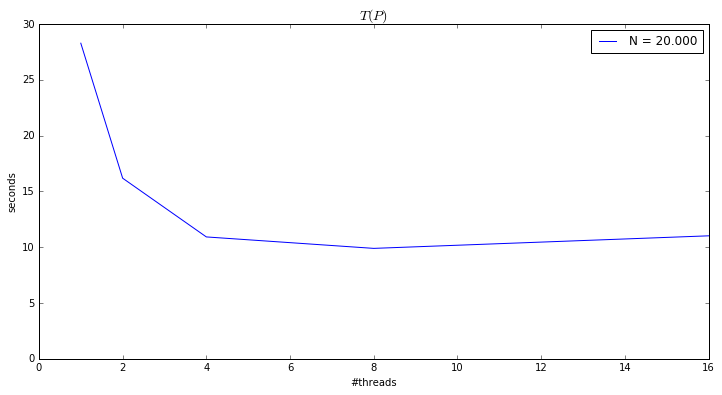

In [66]:
#Пусть N = 20.000 частиц. Блуждания от 1 до 500 начиная с 250

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

results = [ [] for  i in range(5)]
i=0
j=0
f = open('stats.txt', 'r')
for line in f:
    results[i].append(line)
    j += 1
    if (j == 7):
        j = 0
        i += 1
        
results_with_N_20k_time = []
results_with_N_20k_P = []

for i in range(0,5):
    results_with_N_20k_time.append(float(((results[i][4]).split(' '))[2]))
    results_with_N_20k_P.append(float(((results[i][4]).split(' '))[8]))
    
plt.figure(figsize=(12, 6))
#for time in results_with_N_20k:

plt.plot(results_with_N_20k_P, results_with_N_20k_time, label="N = 20.000")
plt.title(r"$T(P)$", fontsize=14)
plt.xlabel("#threads")
plt.ylabel("seconds")
plt.xlim(0)
plt.ylim(0)
plt.legend()
plt.show()


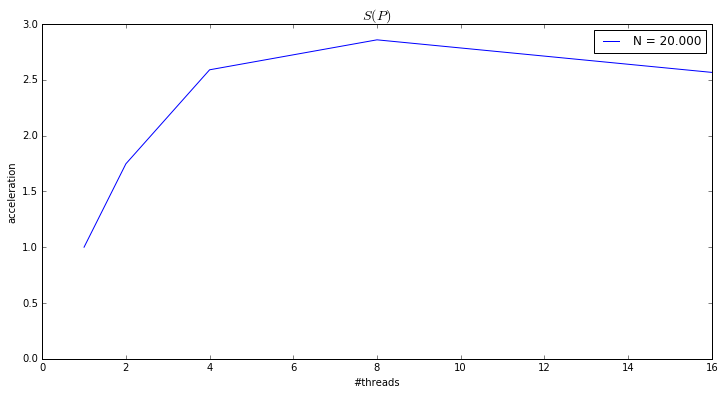

In [67]:
S = (results_with_N_20k_time[0]) / np.array(results_with_N_20k_time) 

plt.figure(figsize=(12, 6))

plt.plot(results_with_N_20k_P, S, label="N = 20.000")
plt.title(r"$S(P)$", fontsize=14)
plt.xlabel("#threads")
plt.ylabel("acceleration")
plt.xlim(0)
plt.ylim(0)
plt.legend()
plt.show()

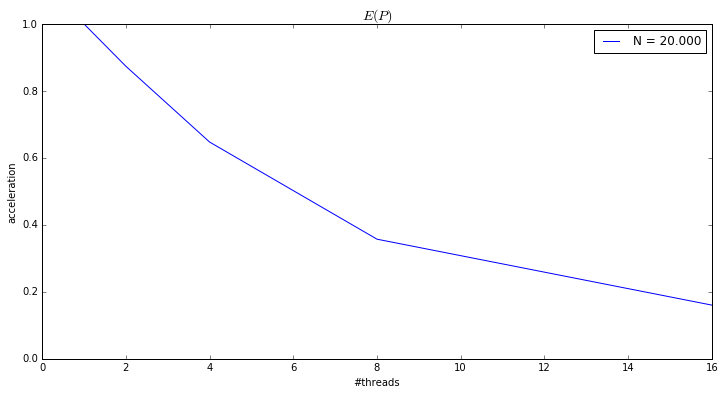

[1.0, 2.0, 4.0, 8.0, 16.0]

In [68]:
E = S / results_with_N_20k_P

plt.figure(figsize=(12, 6))

plt.plot(results_with_N_20k_P, E, label="N = 20.000")
plt.title(r"$E(P)$", fontsize=14)
plt.xlabel("#threads")
plt.ylabel("acceleration")
plt.xlim(0)
plt.ylim(0)
plt.legend()
plt.show()

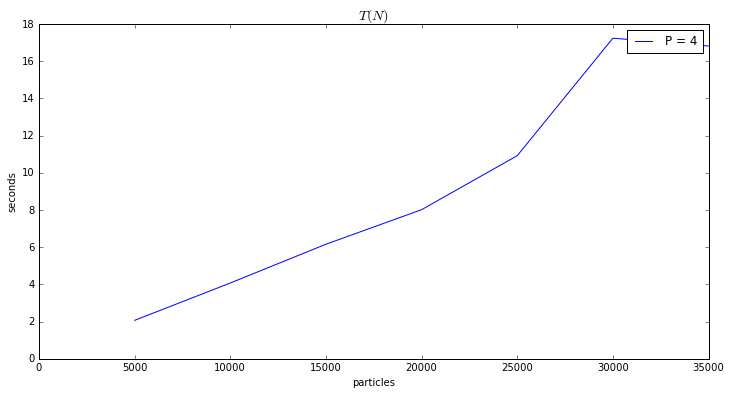

In [81]:
#теперь тоже самое, только кол-во потоков = const
#Пусть P = 4
results_with_P_4_time = []
results_with_P_4_N = []

for i in range(0,7):
    results_with_P_4_time.append(float(((results[2][i]).split(' '))[2]))
    results_with_P_4_N.append(float(((results[2][i]).split(' '))[6]))
    
plt.figure(figsize=(12, 6))
plt.plot(results_with_P_4_N, results_with_P_4_time, label="P = 4")
plt.title(r"$T(N)$", fontsize=14)
plt.xlabel("particles")
plt.ylabel("seconds")
plt.xlim(0)
plt.ylim(0)
plt.legend()
plt.show()

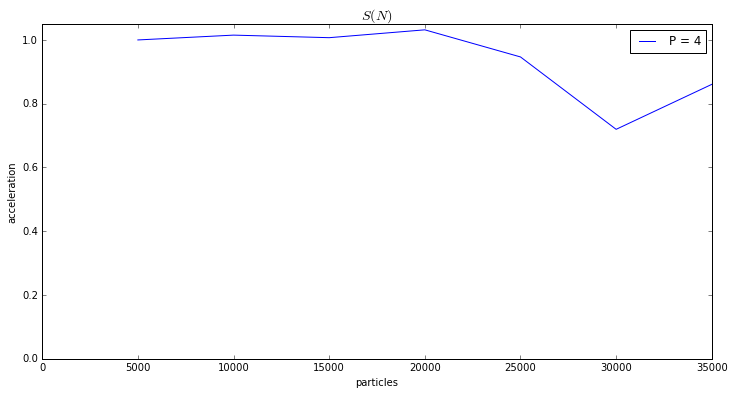

In [84]:
# * на отношение [0] к [i]-му, т.к. ускорение- #обрабатываемых частиц за квадрат времни. => нужно сводить к одинаковому
#кол-ву частиц
for i in range(7):
    S[i] = (results_with_P_4_time[0] * (i+1)) / results_with_P_4_time[i] 

plt.figure(figsize=(12, 6))

plt.plot(results_with_P_4_N, S, label="P = 4")
plt.title(r"$S(N)$", fontsize=14)
plt.xlabel("particles")
plt.ylabel("acceleration")
plt.xlim(0)
plt.ylim(0)
plt.legend()
plt.show()

#графон линеен, значит, ускорение= const, и при разных объемах частиц, обрабатывается одинаковое
#кол-во в единицу времени

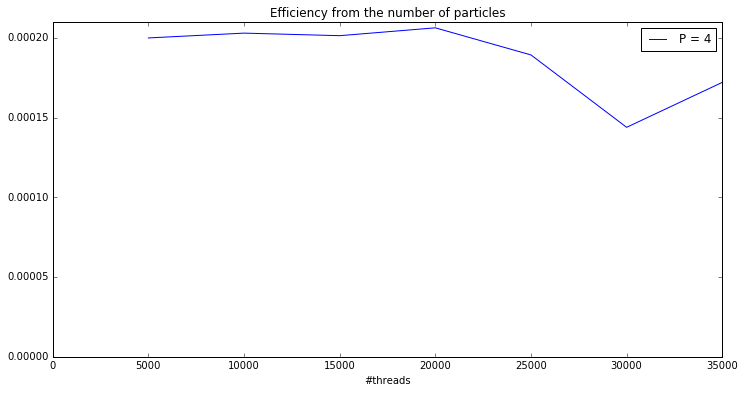

In [88]:
#объяснение * на "i" аналогичное
for i in range(7):
    E[i] = (S[i] * (i+1)) / results_with_P_4_N[i] 

plt.figure(figsize=(12, 6))

plt.plot(results_with_P_4_N, E, label="P = 4")
plt.title("Efficiency from the number of particles", fontsize=12)
plt.xlabel("#threads")
plt.xlim(0)
plt.ylim(0)
plt.legend()
plt.show()

Вывод: у меня не Core i9. эфективность работы возрастает при увеличении до 4 потоков. Эфективность обработки частиц не подает при увеличении их количества.